<a href="https://colab.research.google.com/github/asmasw6/NLP-Practices/blob/main/NLP_Practices_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp("Apple is looking at buying U.K. startup for $1 billion.  startup for $15 billion")
for token in doc.sents:
    print(token)

Apple is looking at buying U.K. startup for $1 billion.  
startup for $15 billion


In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize("Apple is looking at buying U.K. startup for $1 billion.  startup for $15 billion"))

['Apple is looking at buying U.K. startup for $1 billion.', 'startup for $15 billion']


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp("Apple is looking at buying U.K. startup for $1 billion.  startup for $15 billion")
nums = []
for token in doc:
  if token.like_num:
    nums.append(token.text)
nums

tokens = [token.text for token in doc]
tokens



['Apple',
 'is',
 'looking',
 'at',
 'buying',
 'U.K.',
 'startup',
 'for',
 '$',
 '1',
 'billion',
 '.',
 ' ',
 'startup',
 'for',
 '$',
 '15',
 'billion']

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/spam.csv")

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.Category.value_counts()

,count
Category,
ham,4825
spam,747


In [ ]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2)

In [ ]:
X_train.shape

(4457,)

In [ ]:
X_test.shape

(1115,)

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
X_train[:4][4354]

'Fun fact: although you would think armand would eventually build up a tolerance or some shit considering how much he smokes, he gets fucked up in like 2 hits'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train_count.shape

(4457, 7771)

In [ ]:
v.get_feature_names_out().shape

(7771,)

In [ ]:
v.vocabulary_

{'fun': 3089,
 'fact': 2787,
 'although': 942,
 'you': 7735,
 'would': 7640,
 'think': 6886,
 'armand': 1074,
 'eventually': 2705,
 'build': 1568,
 'up': 7219,
 'tolerance': 6993,
 'or': 5020,
 'some': 6338,
 'shit': 6141,
 'considering': 2000,
 'how': 3572,
 'much': 4684,
 'he': 3417,
 'smokes': 6303,
 'gets': 3169,
 'fucked': 3076,
 'in': 3696,
 'like': 4167,
 'hits': 3497,
 'double': 2449,
 'mins': 4544,
 '1000': 258,
 'txts': 7141,
 'on': 4977,
 'orange': 5024,
 'tariffs': 6750,
 'latest': 4086,
 'motorola': 4650,
 'sonyericsson': 6358,
 'nokia': 4852,
 'with': 7576,
 'bluetooth': 1424,
 'free': 3028,
 'call': 1621,
 'mobileupd8': 4594,
 '08000839402': 47,
 'call2optout': 1623,
 'hf8': 3474,
 'see': 6037,
 'when': 7511,
 'we': 7448,
 'finish': 2908,
 'have': 3406,
 'loads': 4221,
 'of': 4939,
 'loans': 4223,
 'to': 6975,
 'pay': 5163,
 'will': 7549,
 'go': 3211,
 'walmart': 7402,
 'll': 4214,
 'stay': 6490,
 'sorry': 6369,
 'missed': 4559,
 'your': 7740,
 'let': 4141,
 'talk': 6740

In [ ]:
X_train_np = X_train_count.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.where(X_train_np[0]!=0)

(array([ 942, 1074, 1568, 2000, 2705, 2787, 3076, 3089, 3169, 3417, 3497,
        3572, 3696, 4167, 4684, 5020, 6141, 6303, 6338, 6886, 6993, 7219,
        7640, 7735]),)

In [ ]:
X_train_np[0][942]

np.int64(1)

In [ ]:
X_train[:4][4354]

'Fun fact: although you would think armand would eventually build up a tolerance or some shit considering how much he smokes, he gets fucked up in like 2 hits'

In [ ]:
v.get_feature_names_out()[942]

'although'

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [ ]:
X_test_count = v.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_count)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.96      0.94      0.95       143

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
emails = [
    "Congratulations! You’ve been selected to win a brand-new iPhone 15. Click here to claim your prize before it’s too late!",
    "Start earning thousands from the comfort of your home. No experience required! Sign up now!",
    "Hi team, the weekly meeting has been moved to Thursday at 3 PM. Please confirm your availability.",
    "Get our premium subscription for 90% off today only! Hurry, this deal ends in 2 hours.",
    "Could you please share the latest progress report on the marketing campaign before tomorrow's meeting?",
    "We noticed unusual activity in your account. Please verify your details immediately to restore access."
]

emails_count = v.transform(emails)
model.predict(emails_count)
# 1 is spam


array([1, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.96      0.94      0.95       143

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
doc=nlp("Apple is looking at buying U.K. startup for $1 billion.  startup for $15 billion")

TF-IDF


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [2]:
# let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [4]:
# v.vocabulary_

v.get_feature_names_out()

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [5]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")

already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2.386294361119891
thor : 2.386294361119891
tomorrow : 1.2876820724517808
you : 2.386294361119891


In [6]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

In [7]:

import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("/content/Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [8]:
#check the distribution of labels
df['label'].value_counts()

,count
label,
Household,6000
Electronics,6000
Clothing & Accessories,6000
Books,6000


In [9]:
#Add the new column which gives a unique number to each of these labels

df['label_num'] = df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

#checking the results
df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [11]:

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
X_train.head()



Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


,Text
15820,IRIS Furniture Children Deluxe Spiderman Toddl...
23224,Godox CB-09 Hard Carrying Storage Suitcase Car...
4638,Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245,Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378,Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...


In [12]:
y_train.value_counts()


,count
label_num,
0,4800
2,4800
3,4800
1,4800


In [14]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [15]:

X_test[:5]

,Text
20706,Lal Haveli Designer Handmade Patchwork Decorat...
19166,GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209,FabSeasons Camouflage Polyester Multi Function...
2462,Indian Superfoods: Change the Way You Eat Revi...
6621,"Milton Marvel Insulated Steel Casseroles, Juni..."


In [16]:

y_test[:5]

,label_num
20706,0
19166,2
15209,3
2462,1
6621,3


In [17]:

y_pred[:5]

array([0, 2, 3, 1, 0])

In [18]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [21]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [23]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)
df['preprocessed_txt'] = df['Text'].apply(preprocess)
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer woman Art Mysore Silk Saree Bl...


In [24]:

df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [25]:

df.preprocessed_txt[0]

'Urban Ladder Eisner Low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [27]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.98      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1158,   12,   16,   14],
       [  18, 1174,    5,    3],
       [  19,    8, 1170,    3],
       [   5,    6,    1, 1188]])

Text(95.72222222222221, 0.5, 'Truth')

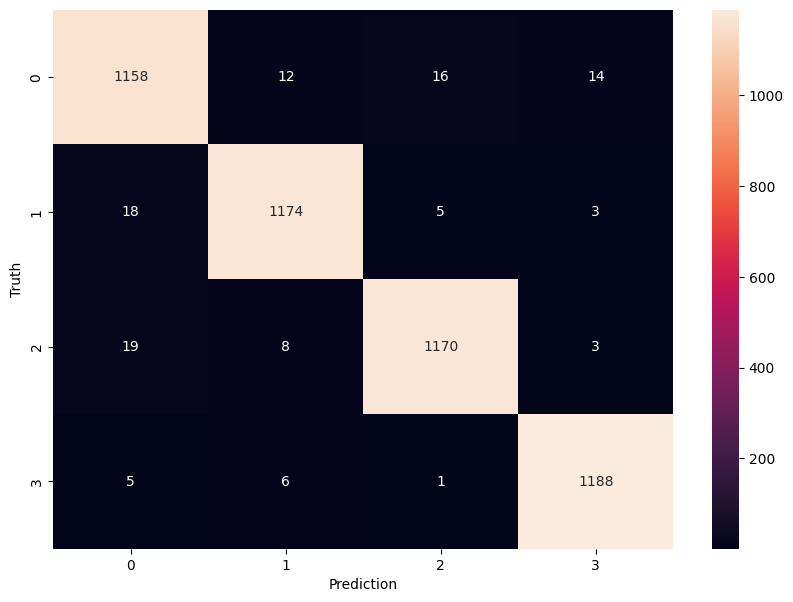

In [29]:

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')